<a href="https://colab.research.google.com/github/Alishba01234/PAI_PROJECT/blob/main/DataCleaning_And_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
# uploaded = files.upload()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pesticides_df = pd.read_excel('pesticidesData.xls', usecols=range(16))
df = pesticides_df.copy()
df.head()

,S.No.,R.No.,Date,Job No.,Firm Name,Brand Name,Common Name,Formulation,Quantity (lit/kg),C & F Value,Ex.Rate (US$),Total Value (Rs.),Origin,Reg.No.,PSI,Category
0,1.0,2.0,"02-January,2017",C/PK/QC16015,Exin Chemicals,Xiaowang,Mesotrione + Atrazine,55% SC,16000.0,3.30,106,5596800.0,China,R-1912,NMCI,Herb.
1,2.0,2.0,"02-January,2017",C/S/PK/170059/16,New Agri Care,Deft,Metsulfuron Methyl,10% WP,2000.0,3.37,106,714440.0,China,R-908,NMCI,Herb.
2,3.0,1.0,"02-January,2017",CU16119148,Tara Imperial Industries,NaN,Glyphosate,41% SL,32000.0,1.78,106,6037760.0,China,R-6945,CU,Herb.
3,4.0,4.0,"02-January,2017",CU16119110,Tara Imperial Industries,NaN,Metalaxyl + Mancozeb,72% WP,15000.0,3.60,106,5724000.0,China,R-4982,CU,Fungicide
4,5.0,4.0,"03-January,2017",PK-130617/16,Sun Crop Pesticides,Truce Xtra,Mesotrione + Atrazine,88.8% WG,1000.0,8.50,106,901000.0,China,R-1983,NMCI,Herb.


In [5]:
df.columns = df.columns.str.strip().str.replace('\n', '').str.replace('  ', ' ')
print(df.columns.tolist())  # verify cleaned names


['S.No.', 'R.No.', 'Date', 'Job No.', 'Firm Name', 'Brand Name', 'Common Name', 'Formulation', 'Quantity (lit/kg)', 'C & F Value', 'Ex.Rate (US$)', 'Total Value (Rs.)', 'Origin', 'Reg.No.', 'PSI', 'Category']


In [8]:
df['Total Value (Rs.)'] = df['Quantity (lit/kg)']*df['C & F Value']*df['Ex.Rate (US$)']

In [10]:
df.drop(columns=['S.No.','R.No.','Ex.Rate (US$)'],inplace=True)
df['Brand Name'].fillna("Form-16",inplace=True)

/tmp/ipython-input-340924966.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Brand Name'].fillna("Form-16",inplace=True)


In [11]:
from dateutil import parser

def parse_messy_date(date_str):
    try:
        parsed_date = parser.parse(date_str, dayfirst=True, fuzzy=True)
        return parsed_date.strftime('%Y-%m-%d')
    except (ValueError, TypeError):
        return np.nan
df['Date'] = df['Date'].apply(parse_messy_date)

In [12]:
pd.set_option('display.max_rows', None)
df['Formulation'].value_counts()

,count
Formulation,
80% WG,133
25% WP,129
15% WP,67
72% WP,64
70% WP,52
75% SP,49
20% SL,44
55% SC,41
55% SC,40


In [13]:
import re

# Regex to match either:
# 1. number (with optional %) at the start, then type
# 2. OR type at the start, number at the end
pattern = r"""
    ^\s*
    (?:
        (?P<Percentage1>\d+(?:\.\d+)?)       # number at start
        (?:%)?                               # optional %
        \s*(?P<Type1>.+)                     # type after number
    |
        (?P<Type2>[A-Za-z\s]+)               # type at start
        \s*(?P<Percentage2>\d+(?:\.\d+)?)    # number at end
    )
    \s*$
"""

extracted = df['Formulation'].str.extract(pattern, flags=re.VERBOSE)

df['Percentage'] = extracted['Percentage1'].combine_first(extracted['Percentage2'])
df['Type'] = extracted['Type1'].combine_first(extracted['Type2'])

df['Percentage'] = pd.to_numeric(df['Percentage'], errors='coerce')
df['Type'] = df['Type'].str.strip()

df.dropna(subset=['Percentage','Type'],inplace=True)

In [14]:
df.head(10)

,Date,Job No.,Firm Name,Brand Name,Common Name,Formulation,Quantity (lit/kg),C & F Value,Total Value (Rs.),Origin,Reg.No.,PSI,Category,Percentage,Type
0,2017-01-02,C/PK/QC16015,Exin Chemicals,Xiaowang,Mesotrione + Atrazine,55% SC,16000.0,3.30,5596800.0,China,R-1912,NMCI,Herb.,55.0,SC
1,2017-01-02,C/S/PK/170059/16,New Agri Care,Deft,Metsulfuron Methyl,10% WP,2000.0,3.37,714440.0,China,R-908,NMCI,Herb.,10.0,WP
2,2017-01-02,CU16119148,Tara Imperial Industries,Form-16,Glyphosate,41% SL,32000.0,1.78,6037760.0,China,R-6945,CU,Herb.,41.0,SL
3,2017-01-02,CU16119110,Tara Imperial Industries,Form-16,Metalaxyl + Mancozeb,72% WP,15000.0,3.60,5724000.0,China,R-4982,CU,Fungicide,72.0,WP
4,2017-01-03,PK-130617/16,Sun Crop Pesticides,Truce Xtra,Mesotrione + Atrazine,88.8% WG,1000.0,8.50,901000.0,China,R-1983,NMCI,Herb.,88.8,WG
5,2017-01-03,CU16119088,Sino Pak Chemicals,Form-16,Trichlorfon,80% SP,32000.0,2.50,8480000.0,China,R-6829,CU,Insect.,80.0,SP
6,2017-01-03,BTIN/1247/16,Four Brothers Agri Service,Form-16,Clodinafop Propargyl,15% WP,10000.0,10.45,11077000.0,India,R-5975,BALTIC,Herb.,15.0,WP
7,2017-01-04,CU16119140,Sayban International,Form-16,Trichlorfon,80% SP,16000.0,1.65,2798400.0,China,R-6613,CU,Insect.,80.0,SP
8,2017-01-04,CU16129171,ICI Pakistan,Form-16,Trichlorfon,80% SP,25344.0,4.15,11148825.6,China,R-5818,CU,Insect.,80.0,SP
9,2017-01-04,CU16119029,Pak China Chemicals,Form-16,Aluminium Phosphide,56% Tablets,25032.0,3.85,10215559.2,China,R-3550,CU,Fumigant,56.0,Tablets


In [23]:
df['Percentage'].value_counts().sort_index(ascending=True)

,count
Percentage,
0.02,1
0.40,1
0.50,21
1.80,11
1.90,14
2.00,1
2.50,6
3.00,7
3.60,3


In [24]:
df['Type'].value_counts().sort_index(ascending=True)

,count
Type,
2% CHLOROPICRIN,9
ALP TABLETS,29
AQUEOUS SOLUTION,21
CONCENTRATE BAIT,1
CONTROL FORMULATION,3
DRY FLOWABLE,6
EMULSIFIABLE CONCENTRATE,215
"EMULSION, OIL IN WATER",5
FS,11


In [17]:
df['Type'] = (
    df['Type']
    .astype(str)
    .str.strip()
    .str.upper()
    .str.replace(r'[%()+/]', ' ', regex=True)
    .str.replace(r'[^A-Z0-9\s]', '', regex=True)
    .str.replace(r'\s+', ' ', regex=True)
    .str.strip()
)

replace_map = {
    'ALP': 'ALP TABLETS',
    'ALP TAB': 'ALP TABLETS',
    'TAB': 'ALP TABLETS',
    'TABLET': 'ALP TABLETS',
    'TABLETS': 'ALP TABLETS',
    'WP': 'WAIGHTABLE POWDER',
    'WDG 20 60': 'WDG',
    'WS': 'WATER SOLUBLE POWDER',
    'WSOLUBLE POWDER': 'WATER SOLUBLE POWDER',
    'SOLUBLE POWDER': 'WATER SOLUBLE POWDER',
    'SC': 'SOLUBLE CONCENTRATE',
    'OF': 'OIL FORMULATION',
    'OD': 'OIL DISPERSION',
    'EW': 'EMULSION, OIL IN WATER',
    'EC': 'EMULSIFIABLE CONCENTRATE',
    'EMULSIFIER CONCENTRATION': 'EMULSIFIABLE CONCENTRATE',
    'EMULSION CONCENTRATION': 'EMULSIFIABLE CONCENTRATE',
    'DF': 'DRY FLOWABLE',
    'ME': 'MICRO EMULSION',
    'G L CS': 'GRAMS PER LITRE SOLUBLE CONCENTRATE',
    'G L SOLUBLE CONCENTRATION': 'GRAMS PER LITRE SOLUBLE CONCENTRATE',
    'G L SOLUBLE LIQUID': 'GRAMS PER LITRE SOLUBLE LIQUID',
    'G L SE': 'GRAMS PER LITRE SUSPENSION EMULSION',
    'G/L': 'GRAMS PER LITRE',
    'GL': 'GRAMS PER LITRE',
    'G L': 'GRAMS PER LITRE',
    'SOLUBLE CONCENTRATION': 'SOLUBLE CONCENTRATE',
    'ZC': 'MIXED FORMULATION (ZC)',
    'AS': 'AQUEOUS SOLUTION',
    'SE': 'SUSPENSION EMULSION',
    'SG': 'SOLUBLE GRANULES',
    'KPP': 'KILOGRAMS PER PACK',
    'CF': 'CONTROL FORMULATION',
    'EO': 'EMULSION, OIL IN WATER',
    'G': 'GRAMS PER LITRE',
    'W W': 'WEIGHT BY WEIGHT',
    'W W PERCENTAGE': 'WEIGHT BY WEIGHT',
    '+2': '2% CHLOROPICRIN',
    '2': '2% CHLOROPICRIN',
    '2 PERCENT': '2% CHLOROPICRIN',
    '2 CHLOROPICRIN': '2% CHLOROPICRIN',
    'PLATES STRIPS': 'PLATES',
}

# Normalize using replacement dictionary
df['Type'] = df['Type'].replace(replace_map)
df['Type'].value_counts().sort_index(ascending=True)

,count
Type,
2% CHLOROPICRIN,9
ALP TABLETS,29
AQUEOUS SOLUTION,21
CONCENTRATE BAIT,1
CONTROL FORMULATION,3
DRY FLOWABLE,6
EMULSIFIABLE CONCENTRATE,215
"EMULSION, OIL IN WATER",5
FS,11


In [18]:
df = df.drop('Formulation', axis=1)

In [19]:
df = df.rename(columns={
    'Common Name': 'Composition'
})

In [20]:
df['Category'].value_counts()

,count
Category,
Herb.,500
Insect.,429
Fung.,274
Fungicide,202
Insect,79
Fumigant,31
Biological,21
Fum.,3
Insecticide,2


In [21]:
category_mapping = {
    'Herb.': 'Herbicide',
    'Fung.': 'Fungicide',
    'Insect.': 'Insecticide',
    'Insect': 'Insecticide',
    'Fumigation': 'Fumigant',
    'Fum.': 'Fumigant',
    'Acari': 'Acaricide',
    'Acaracide': 'Acaricide',
    'Acracide': 'Acaricide',
}

In [22]:
df['Category'] = df['Category'].replace(category_mapping)

In [25]:
df['Category'].value_counts()

,count
Category,
Insecticide,510
Herbicide,500
Fungicide,476
Fumigant,35
Biological,21
Acaricide,3


In [26]:
import re

def normalize_firm_name(name):
    if not isinstance(name, str):
        return ""

    name = name.upper()
    name = re.sub(r'[^\w\s]', '', name)
    name = re.sub(r'\s+', ' ', name).strip()

    replacements = {
        'PRIVATE LIMITED': '', 'PVT LTD': '', 'LTD': '', 'LIMITED': '', 'PVT': '',
        'ENTERPRISES': 'ENTERPRISE',
        'ENTREPRENUER': 'ENTREPRENEUR',
        'ENTERPRENEUR': 'ENTREPRENEUR',
        'ENTREPRENEUR': 'ENTERPRISE',
        'CHEMCIALS': 'CHEMICALS',
        'CHEMICALES': 'CHEMICALS',
        'CHEMICALS': 'CHEMICAL',
        'PESTICIDES': 'PESTICIDE',
        'PESTISIDE': 'PESTICIDE',
        'SCIENCES': 'SCIENCE',
        'LIFESCIENCE': 'LIFE SCIENCE',
        'AGROSCIENCE': 'AGRO SCIENCE',
        'AGROSCIENCES': 'AGRO SCIENCE',
        'SERVICES': 'SERVICE',
        'DISTRIBUTERS': 'DISTRIBUTORS',
        'DISTRIBUTION': 'DISTRIBUTORS',
        'CENTER': 'CENTRE',
        'CORP': 'CORPORATION',
        'CORPORATIONORATION': 'CORPORATION',
        'ALNOOR': 'AL NOOR',
        'AGROTREE': 'AGRO TREE',
        'AGROCHINA': 'AGRO CHINA',
        'RICECO': 'RICE CO',
        'WELCOM AGRO': 'WELCOME AGRO',
        'WELCOME AGRO CHEMICAL': 'WELCOME AGRO',
        'WELCOME CHEMICAL': 'WELCOME AGRO',
        'WELCON AGRO CHEMICAL': 'WELCOME AGRO',
        'WELCON CHEMICAL': 'WELCOME AGRO',
        'WELCONE CHEMICAL': 'WELCOME AGRO',
        ' KARACHI': '',
        'PAKISTAN': '',
        'INDUSTRIES': '',
        'STEDECT': 'STEDEC',
        'CORPORATION': '',
        'FOR': '4',
        'R B': 'RB',
        'SERVICE': '',
        'SCIENCE': '',
        'BIOLOGIC AG': 'AGRI',
        'FOURBROTHERS': 'FOURBROTHER',
        'FMC': 'FM',
        'S ESSA': 'SESSA',
    }

    for old, new in replacements.items():
        name = name.replace(old, new)

    name = re.sub(r'\s+', ' ', name).strip()

    return name

df['Firm Name'] = df['Firm Name'].apply(normalize_firm_name)

In [28]:
manual_firm_map = {
    'ABDULLAH HASEEB': 'ABDULLAH HASEEB AGRO CHEMICAL',
    'AGGRIO':'AGGRIO CHEMICAL',
    'AGRI 4CE': 'AGRI 4CE CHEMICAL',
    'AGRO': 'AGRO TREE LIFE',
    'AGROW': 'AGROW MARK',
    'AJMA CHEM': 'AJMA CHEMICAL',
    'AGRO CHEMICAL': 'AL NOOR AGRO CHEMICAL',
    'ARYSTA LIFE SCIENE': 'ARYSTA LIFE',
    'AURIGA CHEMICAL ENTERPRISE': 'AURIGA CHEMICAL',
    'CAPRICORN': 'CAPRICORN ASSOCIATIONS',
    'COMMANDER AGRO CHEMICAL': 'COMMANDER AGRO',
    'DU PONT OPERATIONS': 'DUPONT',
    'DUPENT OPERATION': 'DUPONT',
    'FOURBROTHER AGRI': 'FOURBROTHER BIOLOGIC',
    'FOURBROTHERBIOLOGIC': 'FOURBROTHER BIOLOGIC',
    'HELB AGRO CHEMICAL': 'HELB AGRO',
    'HELB PESTICIDE CHEMICAL': 'HELB PESTICIDE',
    'HEXTAR CHEMICAL ENTERPRISE': 'HEXTAR CHEMICAL',
    'NAFEES ENTERPRENUER': 'NAFEES ENTERPRISE',
    'PRIME BIOLOGICAL': 'PRIME BIOLOGICAL ENTERPRISE',
}

manual_firm_map_normalized = {normalize_firm_name(k): v for k, v in manual_firm_map.items()}

df['Firm Name'] = df['Firm Name'].replace(manual_firm_map_normalized)


df['Firm Name'].value_counts().sort_index(ascending=True)

,count
Firm Name,
ABDULLAH HASEEB AGRO CHEMICAL,15
ADEEL PESTICIDE,1
AGGRIO CHEMICAL,6
AGRI 4CE CHEMICAL,15
AGRI INTERNATIONAL,2
AGRI TOP,3
AGRICA CHEMICAL,12
AGRIMORE,8
AGRINCHEM ENTERPRISE,4


In [29]:
df['Brand Name'].value_counts().sort_index(ascending=True)

,count
Brand Name,
Acelam,4
Acord,1
Acrid,1
Acrobat MZ,2
Actara,6
Actara ST,1
Adventure,1
Agroguard,1
Aiker,2


In [30]:
import pandas as pd

df['Brand Name'] = (
    df['Brand Name']
    .astype(str)
    .str.strip()
    .str.lower()
    .str.replace(r'[-_/]', ' ', regex=True)
    .str.replace(r'\s+', ' ', regex=True)
    .str.title()
)

manual_map = {
    'Form 16': 'Form-16',
    'Ful Clear': 'Ful-Clear',
    'Ful Control': 'Ful-Control',
    'Ridomil Gold Mz': 'Ridomil Gold MZ',
    'Thiovet Jet': 'Thiovit Jet',
    'Kumulus Df': 'Kumulus-DF',
    'Kumulus D F': 'Kumulus-DF',
    'Liman Tian': 'Li Man Tian',
    'Hombre ': 'Hombre',
    'Defeater ': 'Defeater',
    'Sega Pest Clear': 'Sega',
    'Recado Xtra': 'Recado',
    'Hombre Excel': 'Hombre',
    'Double Star': 'Double',
    'Defeater Plus': 'Defeater',
    'Atlantis Super': 'Atlantis',
    'Actara St': 'Actara',
    'Segawin': 'Sega',
    'Romer': 'Romeo',
    'Core': 'Cure',
}
df['Brand Name'] = df['Brand Name'].replace(manual_map)
df['Brand Name'].value_counts().sort_index(ascending=True)

,count
Brand Name,
Acelam,4
Acord,1
Acrid,1
Acrobat Mz,2
Actara,7
Adventure,1
Agroguard,1
Aiker,2
Aimanli,1


In [31]:
df['Origin'].value_counts()

,count
Origin,
China,1039
India,297
Germany,59
USA,33
France,16
Indonesia,16
Denmark,15
Australia,13
Japan,12


In [32]:
origin_dict = {
    'Malysia': 'Malaysia',
    'England': 'UK',
    'Korea': 'South Korea',
    'Ausrtia': 'Austria',
    'Austalia': 'Australia',
}

df['Origin'].replace(origin_dict, inplace=True)
df['Origin'].value_counts()

/tmp/ipython-input-3762645648.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Origin'].replace(origin_dict, inplace=True)


,count
Origin,
China,1039
India,297
Germany,59
USA,33
France,16
Indonesia,16
Denmark,15
Australia,14
Japan,12


In [33]:
df['PSI'].value_counts()

,count
PSI,
CU,852
NMCI,458
BALTIC,83
Baltic,82
ICI,53
Cotecna,11
Japan,2
C.N,1
BALTIC Control,1


In [34]:
psi_dict = {
    'BALTIC Control': 'BALTIC',
    'Baltic': 'BALTIC',
}

df['PSI'].replace(psi_dict, inplace=True)
df['PSI'].value_counts()

/tmp/ipython-input-460777582.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PSI'].replace(psi_dict, inplace=True)


,count
PSI,
CU,852
NMCI,458
BALTIC,166
ICI,53
Cotecna,11
Japan,2
C.N,1
PIC,1
China,1


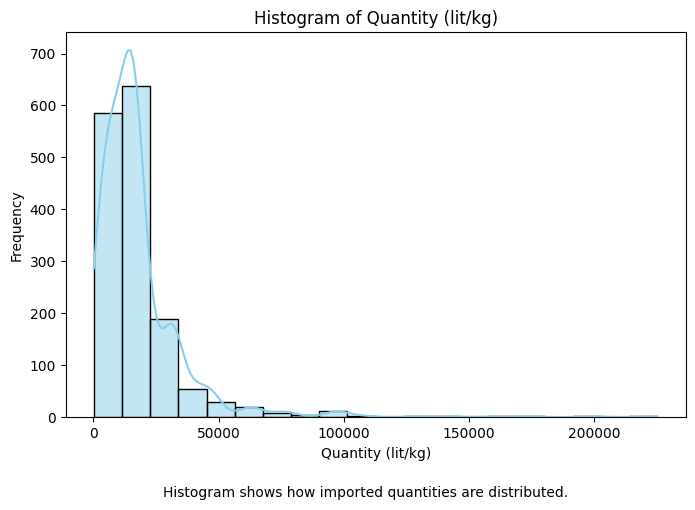

In [36]:
# ==========
# Histogram
# ==========
plt.figure(figsize=(8,5))
sns.histplot(df['Quantity (lit/kg)'], kde=True, color='skyblue', bins=20)
plt.title("Histogram of Quantity (lit/kg)")
plt.xlabel("Quantity (lit/kg)")
plt.ylabel("Frequency")

plt.figtext(0.5, -0.05, "Histogram shows how imported quantities are distributed.", ha="center", fontsize=10)
plt.show()


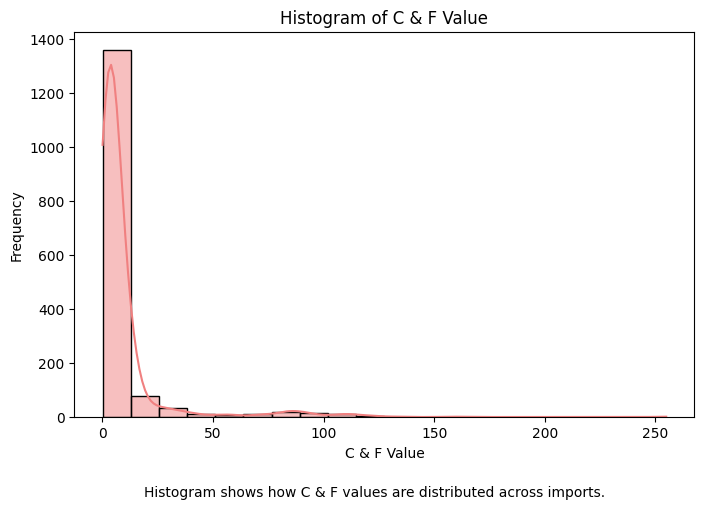

In [39]:
# =========================
# Histogram with legend
# =========================
plt.figure(figsize=(8,5))
sns.histplot(df['C & F Value'], kde=True, color='lightcoral', bins=20)
plt.title("Histogram of C & F Value")
plt.xlabel("C & F Value")
plt.ylabel("Frequency")

# Good legend/insight
plt.figtext(0.5, -0.05, "Histogram shows how C & F values are distributed across imports.", ha="center", fontsize=10)
plt.show()


count    1.545000e+03
mean     9.417707e+06
std      1.773937e+07
min      1.643000e+05
25%      3.222400e+06
50%      5.549100e+06
75%      9.361920e+06
max      2.745930e+08
Name: Total Value (Rs.), dtype: float64
Missing values: 0


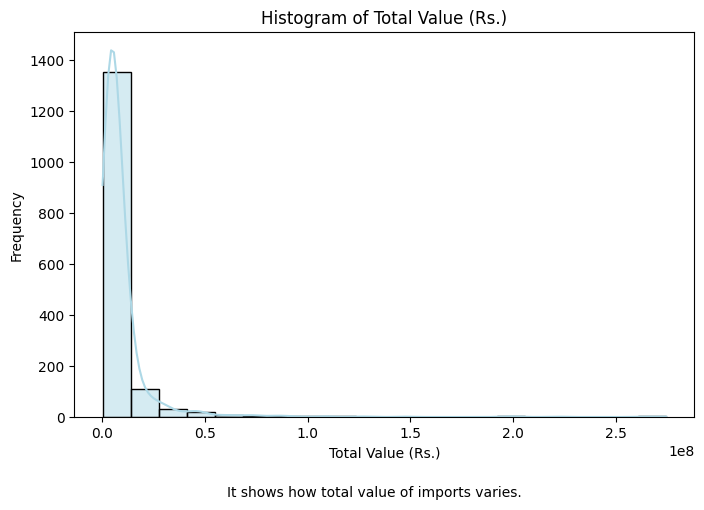

In [41]:
# Summary statistics
print(df['Total Value (Rs.)'].describe())

# Missing values
print("Missing values:", df['Total Value (Rs.)'].isnull().sum())

# =========================
# Histogram
# =========================
plt.figure(figsize=(8,5))
sns.histplot(df['Total Value (Rs.)'], kde=True, color='lightblue', bins=20)
plt.title("Histogram of Total Value (Rs.)")
plt.xlabel("Total Value (Rs.)")
plt.ylabel("Frequency")

plt.figtext(0.5, -0.05, "It shows how total value of imports varies.", ha="center", fontsize=10)
plt.show()


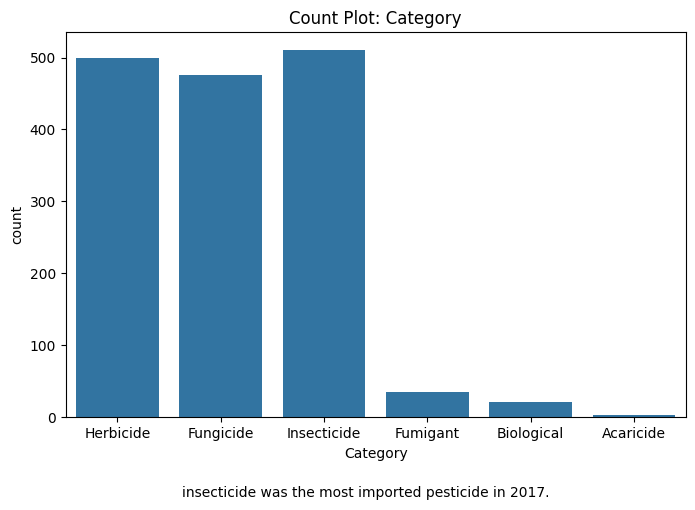

In [42]:
plt.figure(figsize=(8,5))
sns.countplot(x='Category', data=df)
plt.title("Count Plot: Category")
plt.figtext(0.5, -0.05, "insecticide was the most imported pesticide in 2017.", ha="center", fontsize=10)

plt.show()


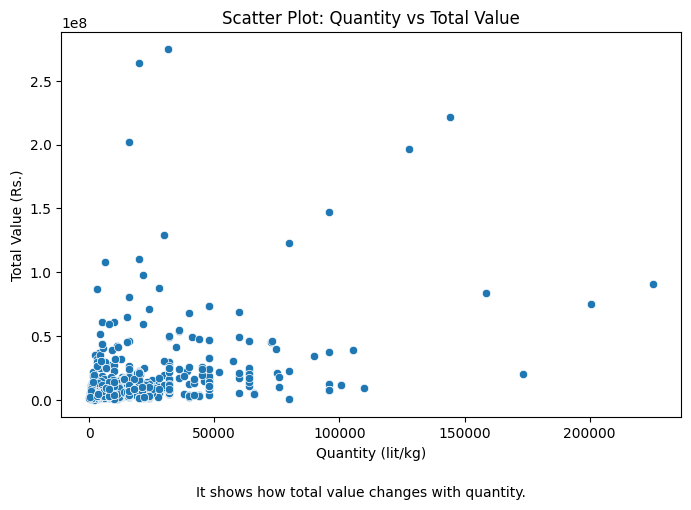

In [45]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Quantity (lit/kg)', y='Total Value (Rs.)', data=df)
plt.title("Scatter Plot: Quantity vs Total Value")
plt.xlabel("Quantity (lit/kg)")
plt.ylabel("Total Value (Rs.)")

# Short legend/insight
plt.figtext(0.5, -0.05, "It shows how total value changes with quantity.", ha="center", fontsize=10)

plt.show()


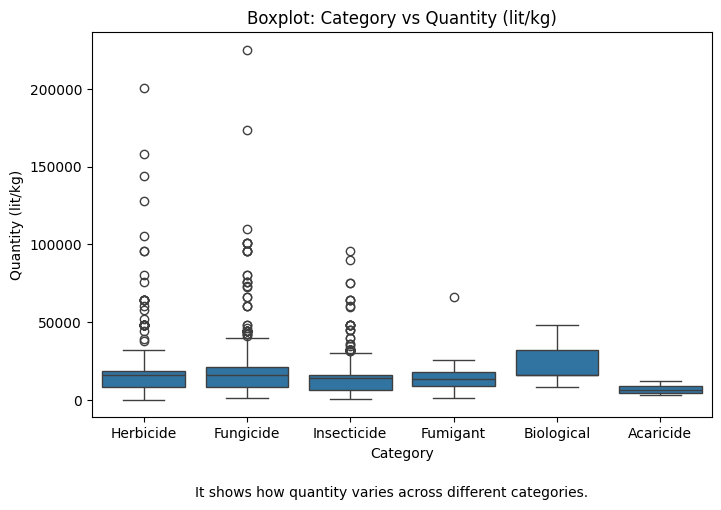

In [46]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Category', y='Quantity (lit/kg)', data=df)

plt.title("Boxplot: Category vs Quantity (lit/kg)")

# Short legend/insight
plt.figtext(0.5, -0.05, "It shows how quantity varies across different categories.", ha="center", fontsize=10)

plt.show()


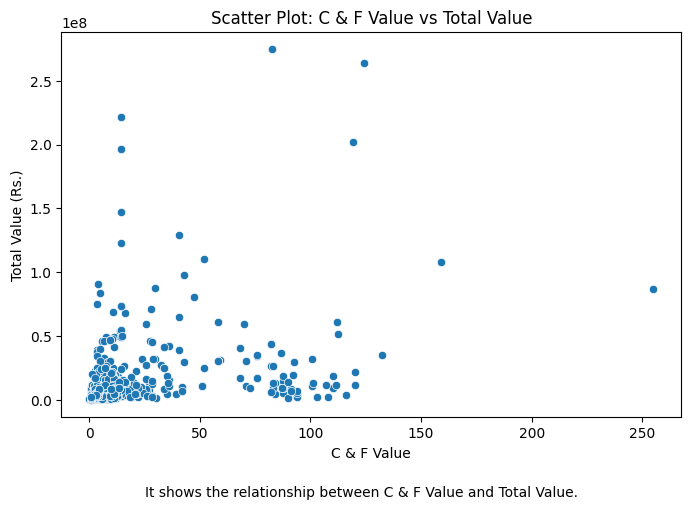

In [47]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='C & F Value', y='Total Value (Rs.)', data=df)

plt.title("Scatter Plot: C & F Value vs Total Value")
plt.xlabel("C & F Value")
plt.ylabel("Total Value (Rs.)")

# Short legend/insight
plt.figtext(0.5, -0.05, "It shows the relationship between C & F Value and Total Value.", ha="center", fontsize=10)

plt.show()


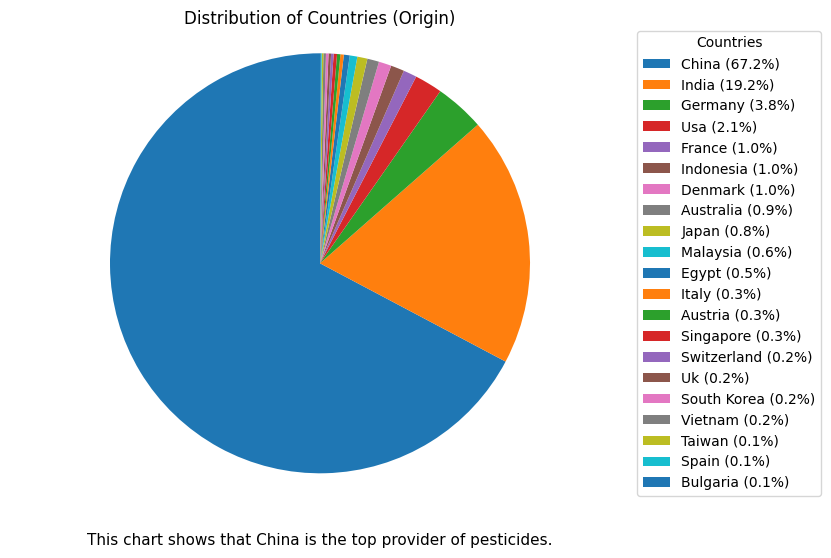

In [49]:
# Clean the country names
df['Origin_Name'] = (
    df['Origin']
    .astype(str)
    .str.strip()
    .str.title()     # Converts 'china', 'CHINA', ' China ' → 'China'
)

# Count countries
origin_counts = df['Origin_Name'].value_counts()

# Safety check
if origin_counts.empty:
    print("No countries found in Origin column — check data.")
else:
    # Calculate percentages
    percentages = 100 * origin_counts / origin_counts.sum()
    labels_with_pct = [
        f'{country} ({pct:.1f}%)'
        for country, pct in zip(origin_counts.index, percentages)
    ]

    # Top country
    top_country = origin_counts.idxmax()

    # Plot
    plt.figure(figsize=(8,6))
    plt.pie(origin_counts, startangle=90)

    plt.legend(
        labels_with_pct,
        title="Countries",
        loc="center left",
        bbox_to_anchor=(1, 0.5)
    )
    plt.title("Distribution of Countries (Origin)")
    plt.axis('equal')

    plt.text(
        0.5, -0.1,
        f"This chart shows that {top_country} is the top provider of pesticides.",
        ha='center',
        va='center',
        fontsize=11,
        transform=plt.gca().transAxes
    )

    plt.show()


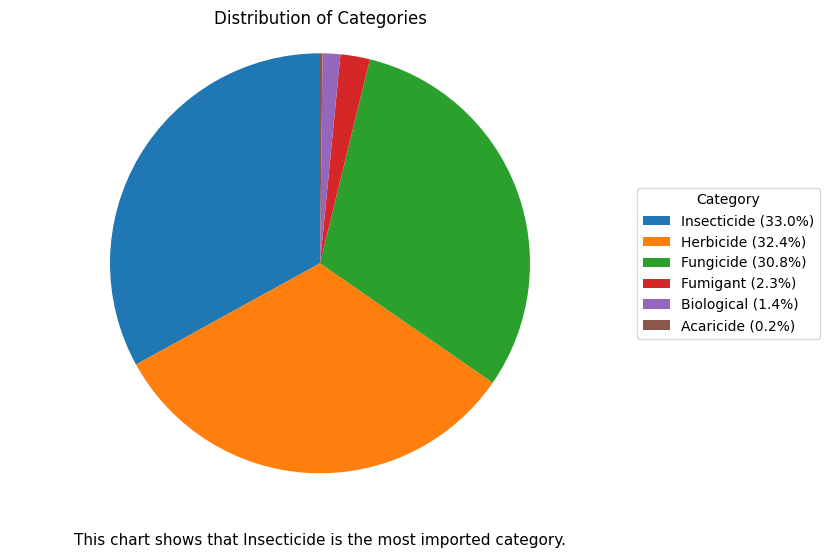

In [52]:

category_counts = df['Category'].value_counts()

# Calculate percentages
percentages = 100 * category_counts / category_counts.sum()
labels_with_pct = [f'{cat} ({pct:.1f}%)' for cat, pct in zip(category_counts.index, percentages)]

# Find the highest imported category
top_category = category_counts.idxmax()

plt.figure(figsize=(8,6))
plt.pie(category_counts, startangle=90)
plt.legend(labels_with_pct, title="Category", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("Distribution of Categories")
plt.axis('equal')

plt.text(
    0.5, -0.1,
    f"This chart shows that {top_category} is the most imported category.",
    ha='center',
    va='center',
    fontsize=11,
    transform=plt.gca().transAxes
)

plt.show()


/tmp/ipython-input-1227474350.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=origin_counts.values, y=origin_counts.index, palette='viridis')


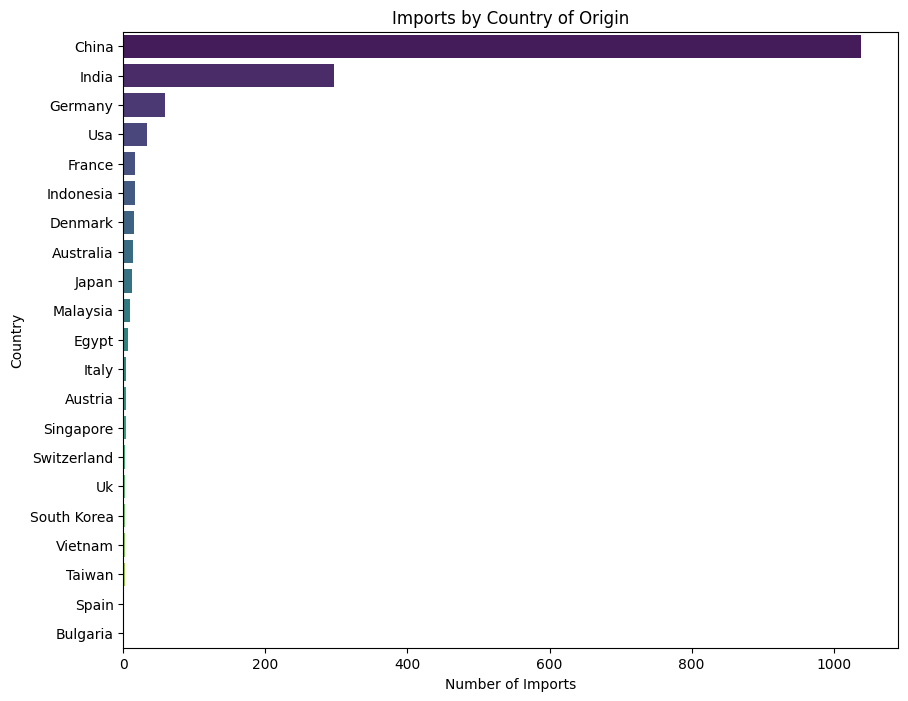

In [55]:
plt.figure(figsize=(10, 8))
# Count and sort
origin_counts = df['Origin_Name'].value_counts().sort_values(ascending=False)

sns.barplot(x=origin_counts.values, y=origin_counts.index, palette='viridis')
plt.title('Imports by Country of Origin')
plt.xlabel('Number of Imports')
plt.ylabel('Country')
plt.show()

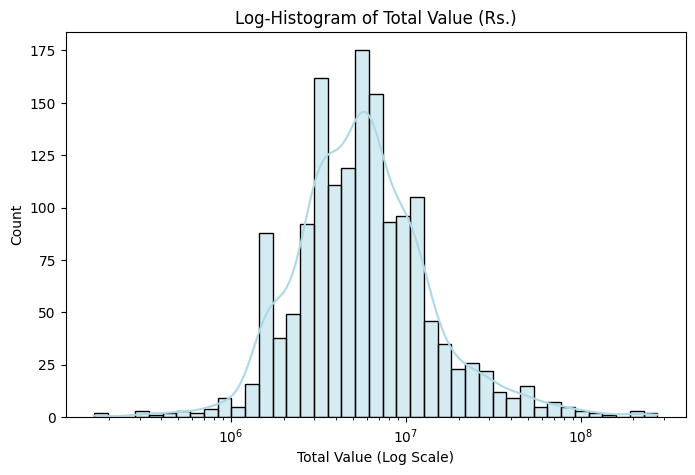

In [56]:
plt.figure(figsize=(8,5))
# Apply log scale to x-axis to normalize the view
sns.histplot(df['Total Value (Rs.)'], kde=True, log_scale=True, color='lightblue')
plt.title("Log-Histogram of Total Value (Rs.)")
plt.xlabel("Total Value (Log Scale)")
plt.show()

/tmp/ipython-input-1786351179.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_imports = df.set_index('Date').resample('M')['Total Value (Rs.)'].sum().reset_index()


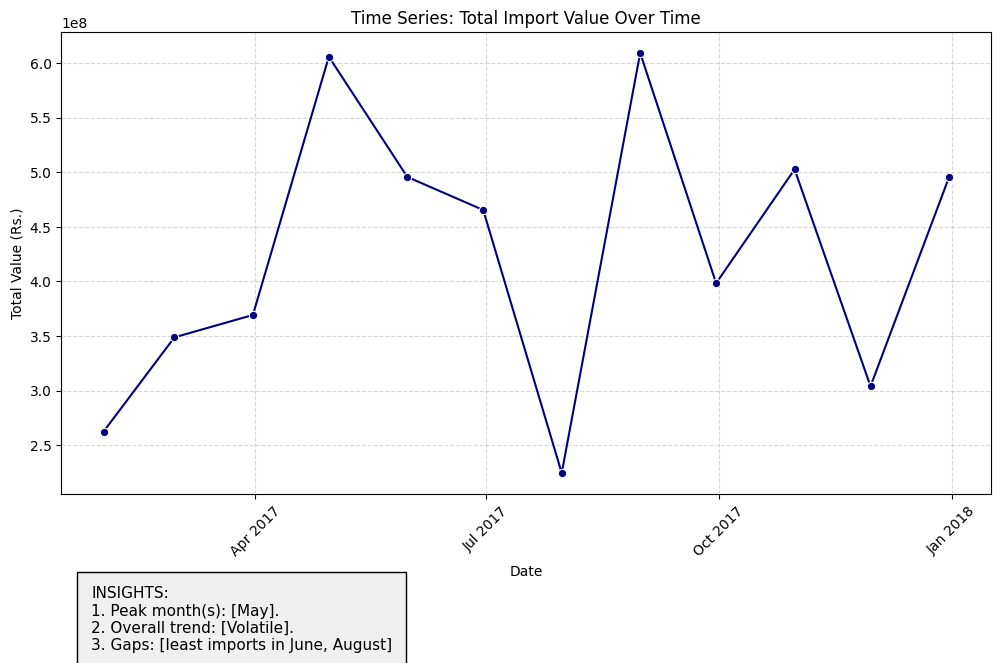

In [57]:
import matplotlib.dates as mdates

# Ensure Date format is correct
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Aggregate data by Month
# We use 'M' for month-end frequency
monthly_imports = df.set_index('Date').resample('M')['Total Value (Rs.)'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_imports, x='Date', y='Total Value (Rs.)', marker='o', color='navy')

# Formatting the x-axis to make dates readable
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)
plt.title('Time Series: Total Import Value Over Time')
plt.ylabel('Total Value (Rs.)')
plt.grid(True, linestyle='--', alpha=0.5)

# --- INSIGHT TEMPLATE ---
insight_text = (
    "INSIGHTS:\n"
    "1. Peak month(s): [May].\n"
    "2. Overall trend: [Volatile].\n"
    "3. Gaps: [least imports in June, August]"
)

plt.figtext(0.15, -0.15, insight_text, ha='left', fontsize=11,
            bbox=dict(facecolor='#f0f0f0', alpha=1, pad=10))

plt.show()

/tmp/ipython-input-220729605.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_firms.values, y=top_firms.index, ax=axes[0], palette='viridis', orient='h')
/tmp/ipython-input-220729605.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.values, y=top_brands.index, ax=axes[1], palette='magma', orient='h')


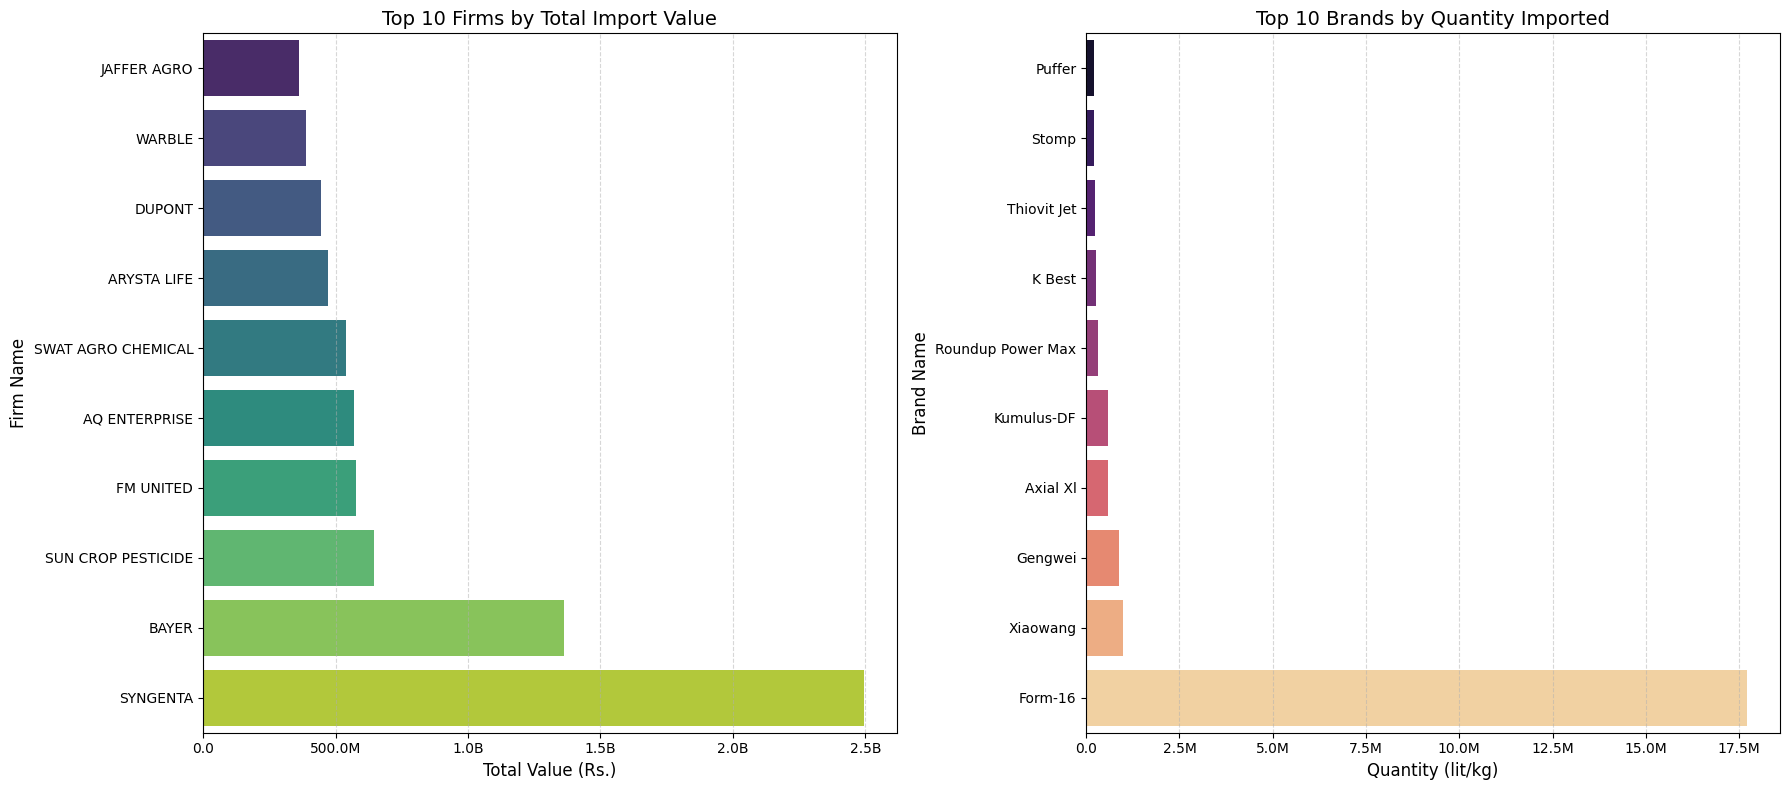

In [58]:
import matplotlib.ticker as ticker
#df['Firm Name'] = df['Firm Name'].astype(str)
#df['Brand Name'] = encoders['Brand Name'].inverse_transform(df['Brand Name'].astype(int))
# Function to format large numbers (e.g., 1,000,000 -> 1M)
def human_format(num, pos):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return '%.1f%s' % (num, ['', 'K', 'M', 'B'][magnitude])

# Set up the canvas
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# -------------------------------------------------------
# Chart 1: Top 10 Firms by Value (Horizontal)
# -------------------------------------------------------
# Sort ascending so the largest bar is at the top when plotting horizontally
top_firms = df.groupby('Firm Name')['Total Value (Rs.)'].sum().nlargest(10).sort_values(ascending=True)

sns.barplot(x=top_firms.values, y=top_firms.index, ax=axes[0], palette='viridis', orient='h')

axes[0].set_title('Top 10 Firms by Total Import Value', fontsize=14)
axes[0].set_xlabel('Total Value (Rs.)', fontsize=12)
axes[0].set_ylabel('Firm Name', fontsize=12)
# Apply the readable number formatter to the X-axis
axes[0].xaxis.set_major_formatter(ticker.FuncFormatter(human_format))
axes[0].grid(axis='x', linestyle='--', alpha=0.5)


# -------------------------------------------------------
# Chart 2: Top 10 Brands by Quantity (Horizontal)
# -------------------------------------------------------

top_brands = df.groupby('Brand Name')['Quantity (lit/kg)'].sum().nlargest(10).sort_values(ascending=True)

sns.barplot(x=top_brands.values, y=top_brands.index, ax=axes[1], palette='magma', orient='h')

axes[1].set_title('Top 10 Brands by Quantity Imported', fontsize=14)
axes[1].set_xlabel('Quantity (lit/kg)', fontsize=12)
axes[1].set_ylabel('Brand Name', fontsize=12)
# Apply the readable number formatter to the X-axis
axes[1].xaxis.set_major_formatter(ticker.FuncFormatter(human_format))
axes[1].grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

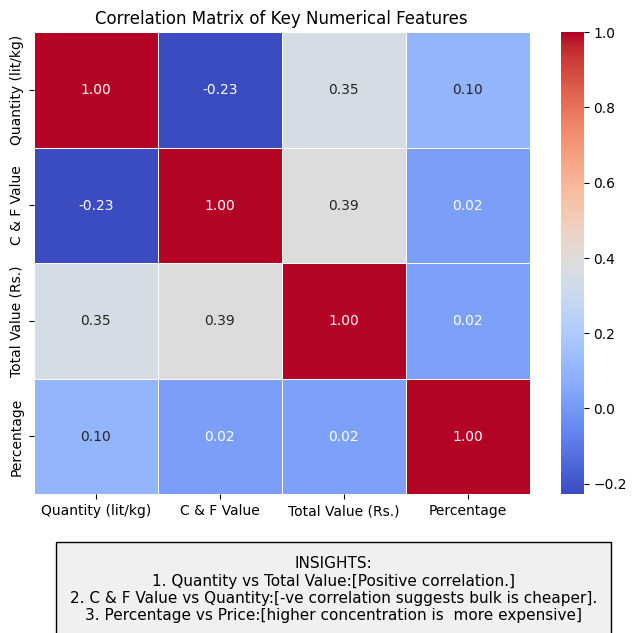

In [60]:
# Select only numeric columns for correlation
numeric_df = df[['Quantity (lit/kg)', 'C & F Value', 'Total Value (Rs.)', 'Percentage']]

plt.figure(figsize=(8, 6))
# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Key Numerical Features')

# --- INSIGHT TEMPLATE ---
plt.figtext(0.5, -0.1,
            "INSIGHTS:\n"
            "1. Quantity vs Total Value:[Positive correlation.]\n"
            "2. C & F Value vs Quantity:[-ve correlation suggests bulk is cheaper].\n"
            "3. Percentage vs Price:[higher concentration is  more expensive]",
            ha='center', fontsize=11, bbox=dict(facecolor='#f0f0f0', alpha=1, pad=10))

plt.show()

/tmp/ipython-input-2057848866.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='C & F Value', data=df, palette='Set2')


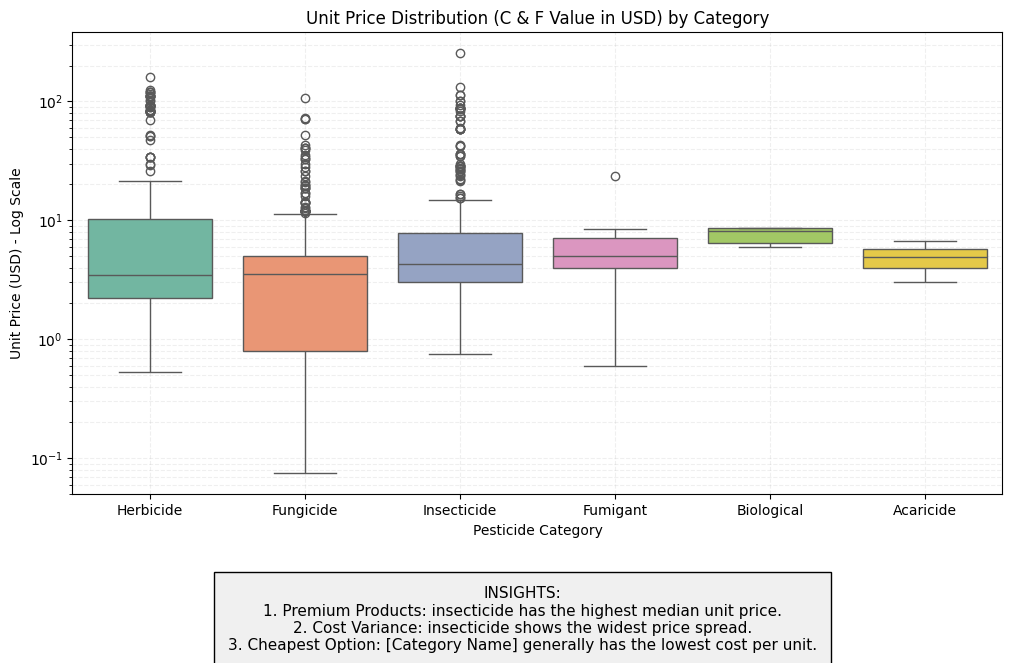

In [64]:
plt.figure(figsize=(12, 6))

# We use C & F Value as the Unit Price
# A Log Scale is applied because prices often range from very low ($1) to very high ($100+)
sns.boxplot(x='Category', y='C & F Value', data=df, palette='Set2')
plt.yscale('log')

plt.title('Unit Price Distribution (C & F Value in USD) by Category')
plt.ylabel('Unit Price (USD) - Log Scale')
plt.xlabel('Pesticide Category')
plt.grid(True, which="both", ls="--", alpha=0.2)

# --- INSIGHT TEMPLATE ---
insight_text = (
    "INSIGHTS:\n"
    "1. Premium Products: insecticide has the highest median unit price.\n"
    "2. Cost Variance: insecticide shows the widest price spread.\n"
    "3. Cheapest Option: [Category Name] generally has the lowest cost per unit."
)

plt.figtext(0.5, -0.15, insight_text, ha='center', fontsize=11,
            bbox=dict(facecolor='#f0f0f0', alpha=1, pad=10))

plt.show()